<a href="https://colab.research.google.com/github/isravazquez/equipo_3_datascience/blob/master/Postwork-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postwork 4

## Data Science on Bedu

## Integrantes:
* Arriaga Palma Fernando, arriaga141@gmail.com
* Hernández Angulo Juan de Jesus, jhernandezangulo@gmail.com
* Martínez Ibarra Hugo, hugomtzib@gmail.com
* Moreno Abrego Bryan Daniel, abre.go@outlook.com
* Silva Tijerina Gilberto, gilberto.silvat2812@gmail.com
* Vazquez Bernal Jaime Israel, israfullshot@gmail.com

Ahora se investigará la dependencia o independencia del número de goles anotados por el equipo de casa y el número de goles anotados por el equipo visitante mediante un procedimiento denominado bootstrap, revisa bibliografía en internet para que tengas nociones de este desarrollo.

Ya se han estimado las probabilidades conjuntas de que el equipo de casa anote X=x goles (x=0,1,... ,8), y el equipo visitante anote Y=y goles (y=0,1,... ,6), en un partido. Obtén una tabla de cocientes al dividir estas probabilidades conjuntas por el producto de las probabilidades marginales correspondientes.

Se utilizará la biblioteca `dplyr`

In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Importar la tabla `joint_proba` del postwork 3 y `data_cleaned` del postwork 2

In [2]:
joint_proba <- read.csv('https://bedu-ds.azurewebsites.net/data/joint_proba.csv')
data_cleaned <- read.csv('https://bedu-ds.azurewebsites.net/data/data_cleaned.csv')

Función para obtener el cociente de la probabilidad conjunta y el producto de las proababildiades marginales

In [3]:
quotients.proba <- function(tabla) # x es la tabla de frecuencias relativa (probabilidad conjunta).
{
  mx<-rowSums(tabla) # Genera la probabilidad marginal de x (local).
  my<-colSums(tabla) # Genera la probabilidad marginal de y (visitante).
  dx<-length(mx)
  dy<-length(my)
  table_quotients<-matrix(nrow = dx, ncol = dy)
  for(i in 1:dx){
    for(j in 1:dy){
      table_quotients[i,j]<-tabla[i,j]/(mx[i]*my[j])
    }
  }
  return(table_quotients)
}

Esta es la tabla/matriz de cocientes.

In [4]:
quotients.proba(joint_proba)

0.00000000,0.954782854,1.0200350126,0.9243723686,1.457090688,0.782161235,1.9554031,0.0000000
0.02092972,0.248025013,0.2543931971,0.2428539435,0.243054815,0.228324220,0.1369945,0.0000000
0.02450980,0.110019070,0.1216646452,0.1276130287,0.092504744,0.133689840,0.0802139,0.2941176
0.02677565,0.040864580,0.0306401748,0.0371761067,0.036276685,0.019473199,0.0584196,0.1071026
0.02753623,0.009888323,0.0076647243,0.0081925979,0.000000000,0.030039526,0.0000000,0.0000000
0.02767098,0.004968355,0.0030808923,0.0041163438,0.000000000,0.006037304,0.0000000,0.0000000
0.02775343,0.001245790,0.0008583536,0.0000000000,0.002685816,0.000000000,0.0000000,0.0000000
0.02777430,0.000000000,0.0003681424,0.0000000000,0.000000000,0.000000000,0.0000000,0.0000000
0.02777473,0.000000000,0.0000000000,0.0005164723,0.000000000,0.000000000,0.0000000,0.0000000


Mediante un procedimiento de boostrap, obtén más cocientes similares a los obtenidos en la tabla del punto anterior. Esto para tener una idea de las distribuciones de la cual vienen los cocientes en la tabla anterior. Menciona en cuáles casos le parece razonable suponer que los cocientes de la tabla en el punto 1, son iguales a 1 (en tal caso tendríamos independencia de las variables aleatorias X y Y).

Primero filtraremos sólo las columnas necesarias del data frame de los datos de goles que resultó de la limpieza.

In [5]:
goals <- select(data_cleaned, FTHG, FTAG)

## Procedimiento boostrap

Se generan muestreos de los datos de goles un cierto némero de veces o repeticiones.

In [6]:
repetitions <- 100
goals_samples <- list()
for(i in 1:repetitions){
  goals_samples[[i]] <- sample_n(goals,dim(goals)[1],replace = T)
}

`sample_n(goals,dim(goals)[1],replace = T)` genera un muestreo de un data frame (goals) con el mismo número de datos que el data frame original `(dim(goals)[1])`, pero con reemplazamiento (algunos datos se pueden repetir), que precisamente es en lo que consiste el proceso bootstrap.

Ahora, se crean las tablas de frecuencia para cada muestra.

In [7]:
freq_absolute <- lapply(goals_samples, table)

Esta función convierte la tabla de frecuencias absolutas (de arriba) en una tabla de frecuencias relativas.

In [8]:
freq.relative <- function(tabla){
  tabla <- tabla/sum(tabla)
}

Lo siguiente es aplicar la función anterior a todas las tablas de frecuencias absolutas. Con esto se obtiene las probabilidades conjuntas para cada muestra.

In [9]:
joint_prpba_samples <- lapply(freq_absolute, freq.relative)

Se aplica la función de cociente de probabilidad a todas las tablas de frecuencias relativas.

In [10]:
quotients_samples <- lapply(joint_prpba_samples, quotients.proba)

Se planteará una prueba de hipótesis para determinar si hay suficiente evidencia estadistica que determine si la media de estos cocientes es igual a 1 (independencia entre X e Y) o diferente de 1 (dependencia entre X e Y).

A continuación, se obtienen las medias de cada muestra (tabla).

In [11]:
mean_samples <- sapply(quotients_samples, mean)

**H0: media = 1** (independencia entre las variables X e Y) vs **H1: media != 1** (dependencia entre las variables X e Y).

Obtenemos la media y desviación estándar de las muestras.

In [12]:
mean_est <- mean(mean_samples)
des_est <- sd(mean_samples)/sqrt(length(mean_samples))

Como el Teorema del límite central indica que las medias se distribuyen de manera normal por lo que se procederá a usar el siguiente estadístico:

In [13]:
test_statistic <- (mean_est-1)/des_est

Como es una prueba bilateral se usa el siguiente p-valor:

In [14]:
p_value <- 2*pnorm(abs(test_statistic),lower.tail = F)
print(p_value)

[1] 6.751556e-52


Lo siguiente es para hacer una conclusión sobre el constraste de hipótesis de acuerdo a un valor de confianza del 95%.

In [15]:
if (p_value < 0.05){
  print("Se rechaza la hipótesis nula H0; es decir, con un 95% de confianza hay evidencia estadística para decir que la media de los cocientes es diferente de 1 lo cual indica que no existe independencia entre las variables")
} else{
  print("No se rechaza la hipótesis nula H0; es decir, NO hay evidencia estadística para decir que la media de los cocientes es diferente de 1 lo cual indica que existe independencia entre las variables")
}

[1] "Se rechaza la hipótesis nula H0; es decir, con un 95% de confianza hay evidencia estadística para decir que la media de los cocientes es diferente de 1 lo cual indica que no existe independencia entre las variables"


Se puede graficar un histograma de las medias de las muestras que apoya el resultado anterior.

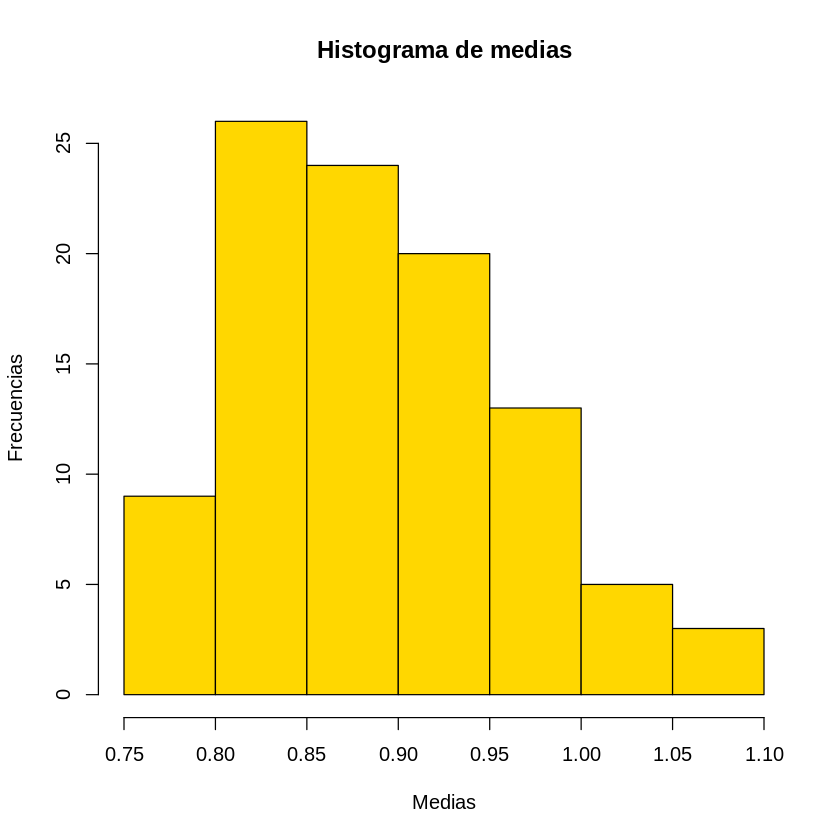

In [16]:
hist(mean_samples, col = "gold", border = "black",
     main = "Histograma de medias",
     xlab = "Medias", ylab = "Frecuencias")